In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
df_heart = pd.read_csv('heart.csv')
df_heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
1,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1
2,58,0,1,136,319,1,0,152,0,0.0,2,2,2,0
3,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
4,59,1,2,150,212,1,1,157,0,1.6,2,0,2,1


In [3]:
# Display basic information about the dataset
print("\nDataset information:")
print(df_heart.info())

# Summary statistics
print("\nSummary statistics of numerical columns:")
print(df_heart.describe())

# Check for missing values
print("\nMissing values:")
print(df_heart.isnull().sum())


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

Summary statistics of numerical columns:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
m

In [4]:
cate_val = []
cont_val = []

for column in df_heart.columns:
    if df_heart[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [5]:
print("The categorical variables og given dataset are:",cate_val )
print("The continous variables og given dataset are:",cont_val )

The categorical variables og given dataset are: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']
The continous variables og given dataset are: ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


In [6]:
df_heart["cp"].unique()

array([0, 2, 1, 3], dtype=int64)

In [7]:
cate_val.remove("sex")
cate_val.remove("target")

In [8]:
data = pd.get_dummies(data=df_heart, columns=cate_val, drop_first=True)

In [9]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,58,1,140,211,165,0.0,1,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,58,0,136,319,152,0.0,0,True,False,False,...,False,False,True,False,True,False,False,False,True,False
3,58,0,150,283,162,1.0,1,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,59,1,150,212,157,1.6,1,False,True,False,...,False,False,True,False,False,False,False,False,True,False


## NORMALIZATION:

In [10]:
# Normalize features
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [11]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,0.834359,0,0.364875,0.930822,-1.874977,0.705408,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False
1,0.393241,1,0.479107,-0.678724,0.690855,-0.912329,1,False,True,False,...,False,False,True,False,False,False,False,False,True,False
2,0.393241,0,0.250643,1.415625,0.125502,-0.912329,0,True,False,False,...,False,False,True,False,True,False,False,False,True,False
3,0.393241,0,1.050269,0.717508,0.560389,-0.060888,1,False,False,True,...,False,False,True,False,False,False,False,False,True,False
4,0.503520,1,1.050269,-0.659332,0.342945,0.449976,1,False,True,False,...,False,False,True,False,False,False,False,False,True,False


## Splitting The Dataset Into The Training Set And Test Set

In [12]:
X = data.drop("target", axis=1)
y = data["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (820, 22)
Shape of X_test: (205, 22)
Shape of y_train: (820,)
Shape of y_test: (205,)


## Exploratory Data Analysis (EDA)

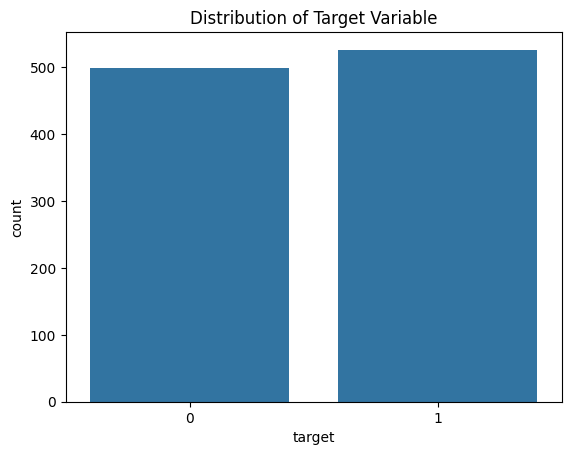

In [14]:
sns.countplot(x='target', data=data)
plt.title('Distribution of Target Variable')
plt.show()

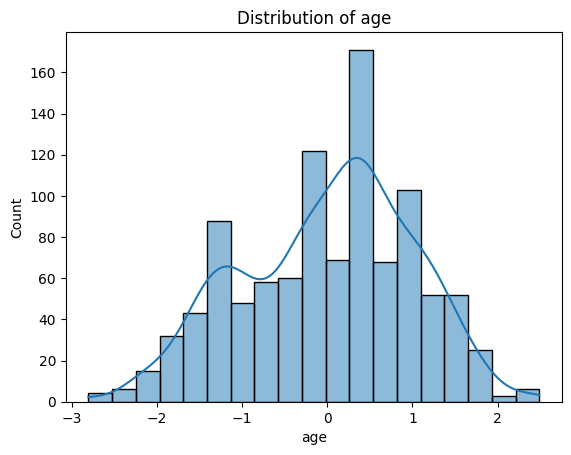

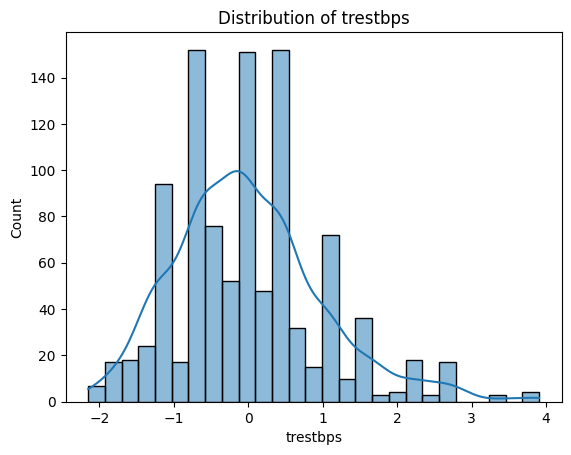

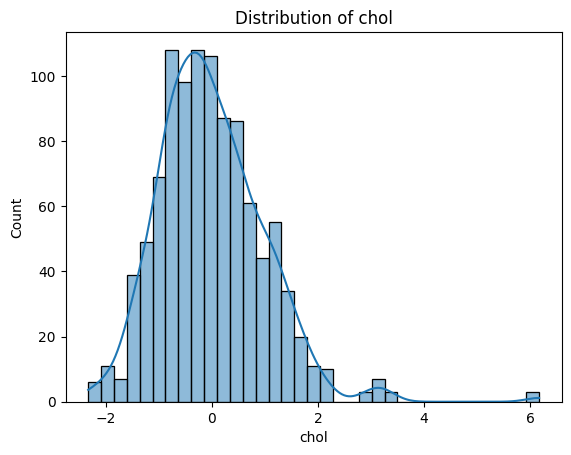

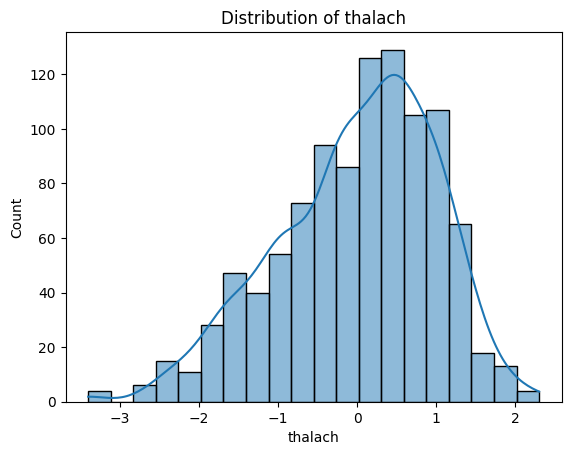

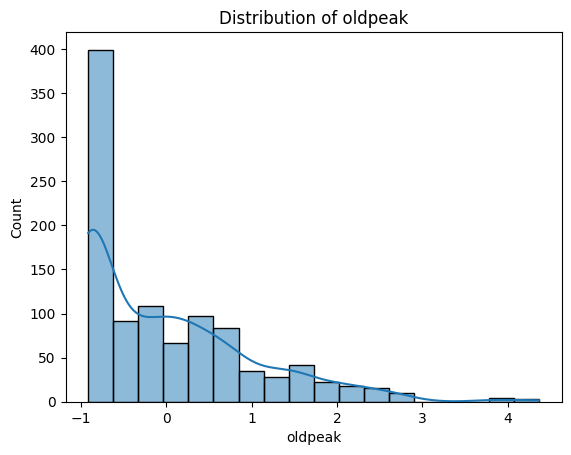

In [15]:
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

for col in numerical_cols:
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

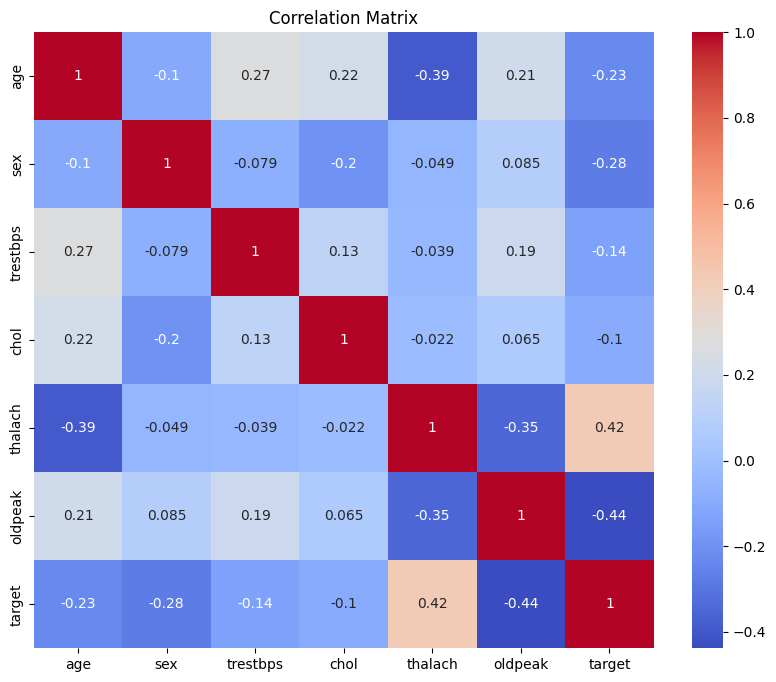

In [16]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])  # Select only numeric columns
correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Feature Selection

In [17]:
from sklearn.feature_selection import SelectKBest, f_classif

# Apply SelectKBest class to extract top 10 features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

# Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Feature','Score']  # naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

    Feature       Score
20   thal_2  378.226131
21   thal_3  305.779496
5   oldpeak  243.450780
12  exang_1  242.883889
4   thalach  222.799538
14  slope_2  182.558032
13  slope_1  142.270121
7      cp_2  116.303376
1       sex   86.689707
16     ca_2   84.728520


## SVM_CLASSIFIER

SVM Accuracy: 0.9365853658536586


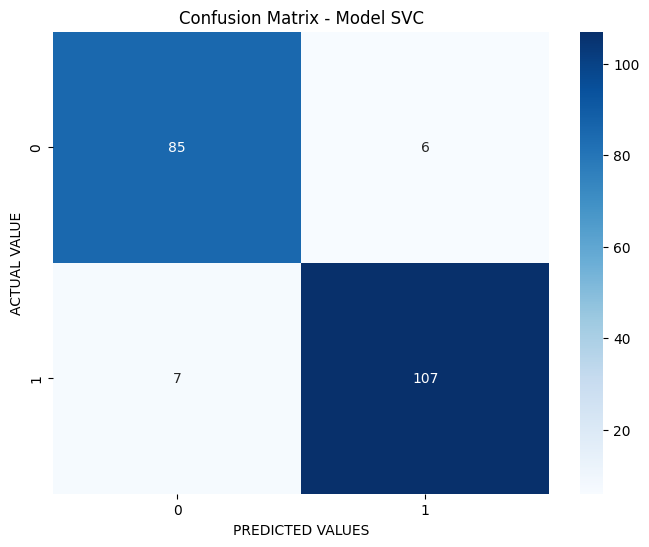

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix
# Creating SVM classifier
svm_classifier = SVC()

# Training the classifier
svm_classifier.fit(X_train, y_train)

# Predicting on test set
svm_predictions = svm_classifier.predict(X_test)

# Evaluating accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)
svc_conf_matrix = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(svc_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model SVC")
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUE")
plt.show()


## DECISION TREE CLASSIFIER

Decision Tree Accuracy: 1.0


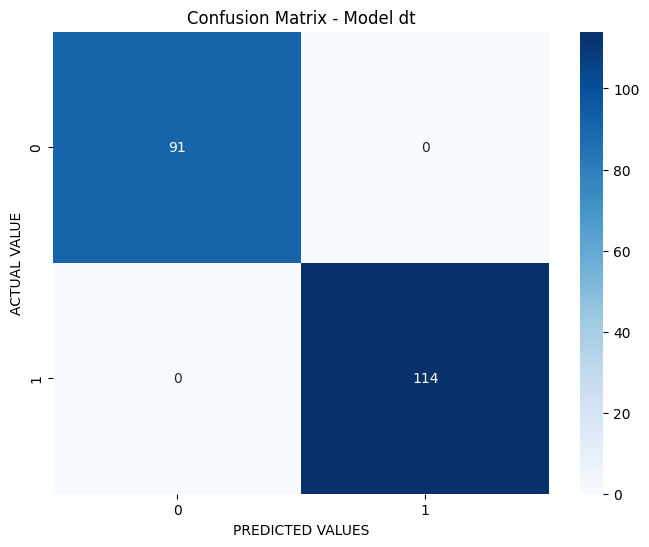

In [19]:
# Creating Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Training the classifier
dt_classifier.fit(X_train, y_train)

# Predicting on test set
dt_predictions = dt_classifier.predict(X_test)
# Evaluating accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model dt")
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUE")
plt.show()


## Neural Network_CLASSIFIER

Neural Network Accuracy: 0.9853658536585366


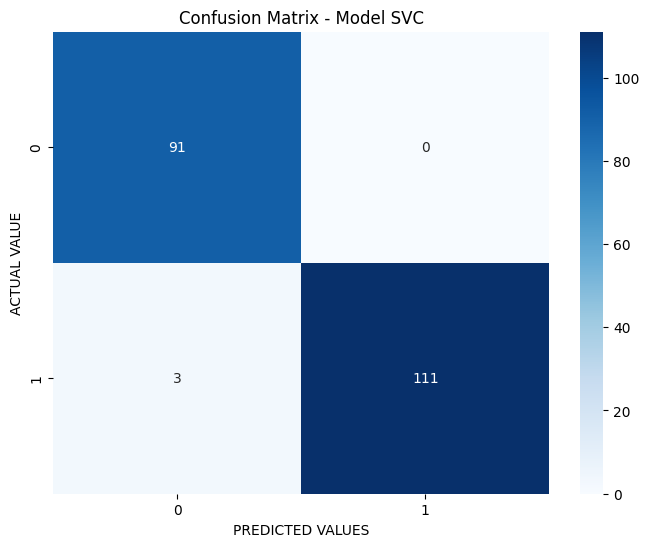

In [20]:
from sklearn.neural_network import MLPClassifier

# Creating MLP classifier with adjusted parameters
mlp_classifier = MLPClassifier(max_iter=1000, solver='adam')  # Adjust max_iter and solver as needed

# Training the classifier
mlp_classifier.fit(X_train, y_train)

# Predicting on test set
mlp_predictions = mlp_classifier.predict(X_test)

# Evaluating accuracy
mlp_accuracy = accuracy_score(y_test, mlp_predictions)
print("Neural Network Accuracy:", mlp_accuracy)
mlp_conf_matrix = confusion_matrix(y_test, mlp_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(mlp_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model SVC")
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUE")
plt.show()


KNN Accuracy: 0.8341463414634146


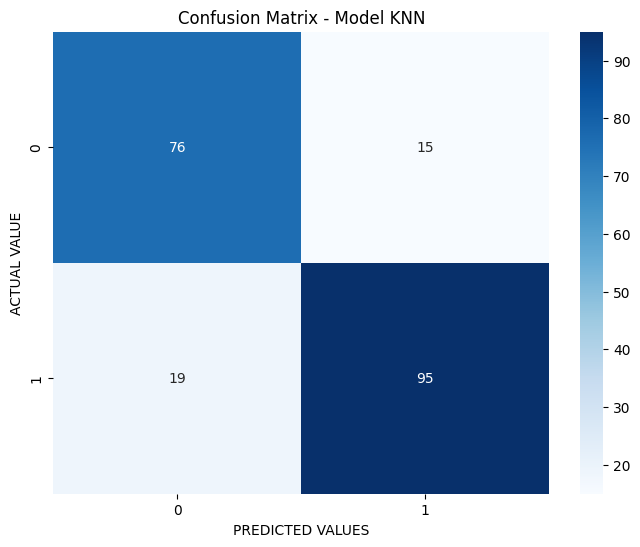

In [21]:
from sklearn.neighbors import KNeighborsClassifier

# Create KNN classifier
knn_classifier = KNeighborsClassifier()

# Training the classifier
knn_classifier.fit(X_train, y_train)

# Predicting on test set
knn_predictions = knn_classifier.predict(X_test)

# Evaluating accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("KNN Accuracy:", knn_accuracy)

# Confusion Matrix
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title("Confusion Matrix - Model KNN")
plt.xlabel("PREDICTED VALUES")
plt.ylabel("ACTUAL VALUE")
plt.show()

## SVM hyperparameters

In [24]:
# SVM hyperparameters
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['rbf', 'linear']
}

# Randomized search cross-validation
grid_search_svm = GridSearchCV(SVC(),param_grid_svm, refit=True, verbose=2, cv=3)
grid_search_svm.fit(X_train, y_train)

print("Best SVM Parameters:", grid_search_svm.best_params_)
print("Best SVM Score:", grid_search_svm.best_score_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.0s
[CV] END ....................C=0.1, gamma=0.1, k

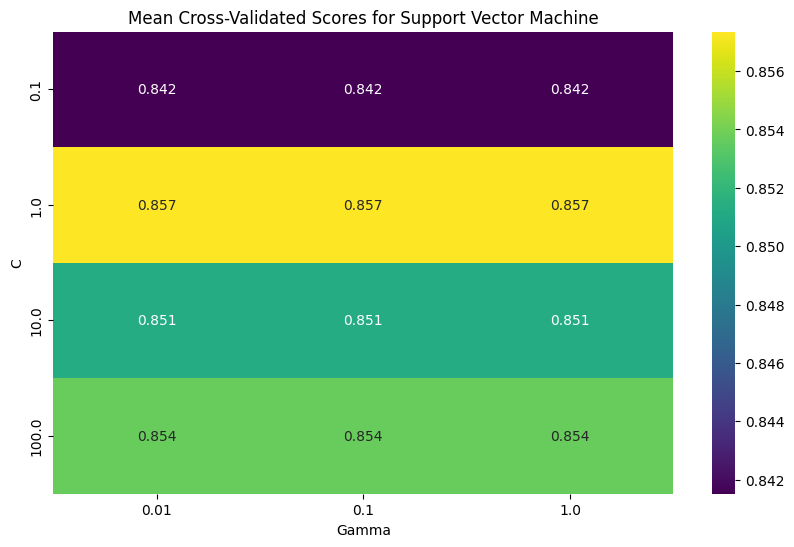

In [43]:
# Extract mean cross-validated scores and hyperparameters from the grid search results
mean_scores_svm = grid_search_svm.cv_results_['mean_test_score']
params_svm = grid_search_svm.cv_results_['params']

# Extract unique values for C and gamma from the parameter combinations
C_values = np.unique([x['C'] for x in params_svm])
gamma_values = np.unique([x['gamma'] for x in params_svm])

# Create a 2D array to store mean scores
mean_scores_2d_svm = np.zeros((len(C_values), len(gamma_values)))

# Populate mean scores into the 2D array
for mean_score, param in zip(mean_scores_svm, params_svm):
    C_idx = np.where(C_values == param['C'])[0][0]
    gamma_idx = np.where(gamma_values == param['gamma'])[0][0]
    mean_scores_2d_svm[C_idx, gamma_idx] = mean_score

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_scores_2d_svm, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=gamma_values, yticklabels=C_values)
plt.xlabel('Gamma')
plt.ylabel('C')
plt.title('Mean Cross-Validated Scores for Support Vector Machine')
plt.show()

## Decision Tree hyperparameters

In [25]:
# Decision Tree hyperparameters
param_grid_dt = {
    'max_depth': [None, 10, 20, 40],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}

grid_search_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, refit=True, verbose=2, cv=3)
grid_search_dt.fit(X_train, y_train)

print("Best Decision Tree Parameters:", grid_search_dt.best_params_)
print("Best Decision Tree Score:", grid_search_dt.best_score_)


Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s
[CV] END max_depth=None, min_samples_leaf=2, min_samples_split=2; total time=   0.0s


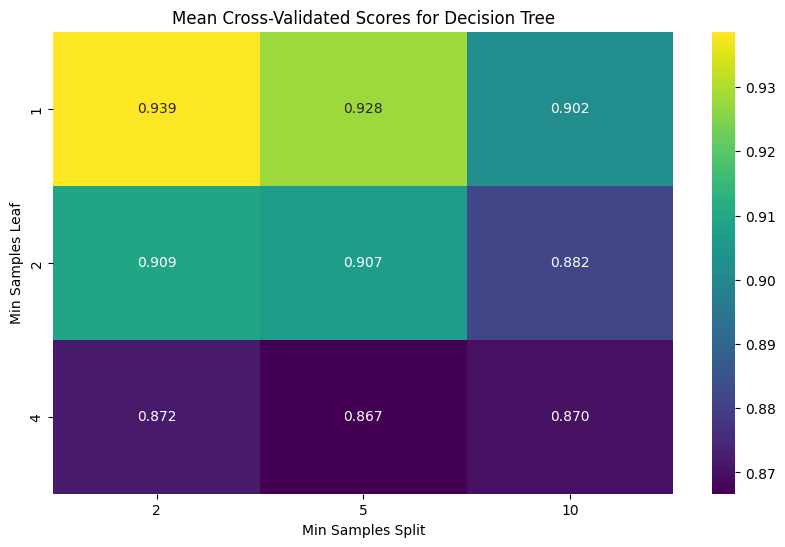

In [26]:
# Extract mean cross-validated scores and hyperparameters from the grid search results
mean_scores_dt = grid_search_dt.cv_results_['mean_test_score']
params_dt = grid_search_dt.cv_results_['params']

# Extract unique values for max_depth, min_samples_leaf, and min_samples_split from the parameter combinations
max_depths = np.unique([x['max_depth'] for x in params_dt if x['max_depth'] is not None])
min_samples_leafs = np.unique([x['min_samples_leaf'] for x in params_dt])
min_samples_splits = np.unique([x['min_samples_split'] for x in params_dt])

# Create a 3D array to store mean scores
mean_scores_3d = np.zeros((len(max_depths), len(min_samples_leafs), len(min_samples_splits)))

# Populate mean scores into the 3D array
for mean_score, param in zip(mean_scores_dt, params_dt):
    if param['max_depth'] is not None:
        max_depth_idx = np.where(max_depths == param['max_depth'])[0][0]
    else:
        max_depth_idx = 0
    min_samples_leaf_idx = np.where(min_samples_leafs == param['min_samples_leaf'])[0][0]
    min_samples_split_idx = np.where(min_samples_splits == param['min_samples_split'])[0][0]
    mean_scores_3d[max_depth_idx, min_samples_leaf_idx, min_samples_split_idx] = mean_score

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_scores_3d.mean(axis=0), annot=True, fmt='.3f', cmap='viridis',
            xticklabels=min_samples_splits, yticklabels=min_samples_leafs)
plt.xlabel('Min Samples Split')
plt.ylabel('Min Samples Leaf')
plt.title('Mean Cross-Validated Scores for Decision Tree')
plt.show()

## NEURAL NETWORK HYPERPARAMETER

In [27]:
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],  # Try different solvers
    'max_iter': [2000,3000]     # Increase max_iter
}

grid_search_mlp = GridSearchCV(MLPClassifier(), param_grid_mlp, refit=True, verbose=2, cv=3)
grid_search_mlp.fit(X_train, y_train)

print("Best Neural Network Parameters:", grid_search_mlp.best_params_)
print("Best Neural Network Score:", grid_search_mlp.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=2000, solver=adam; total time=   1.4s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=2000, solver=adam; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=2000, solver=adam; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=2000, solver=sgd; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=2000, solver=sgd; total time=   0.8s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=2000, solver=sgd; total time=   0.6s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=3000, solver=adam; total time=   1.2s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=3000, solver=adam; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,), max_iter=3000, solver=adam; total time=   1.0s
[CV] END activation=tanh, hidden_layer_sizes=(50,),

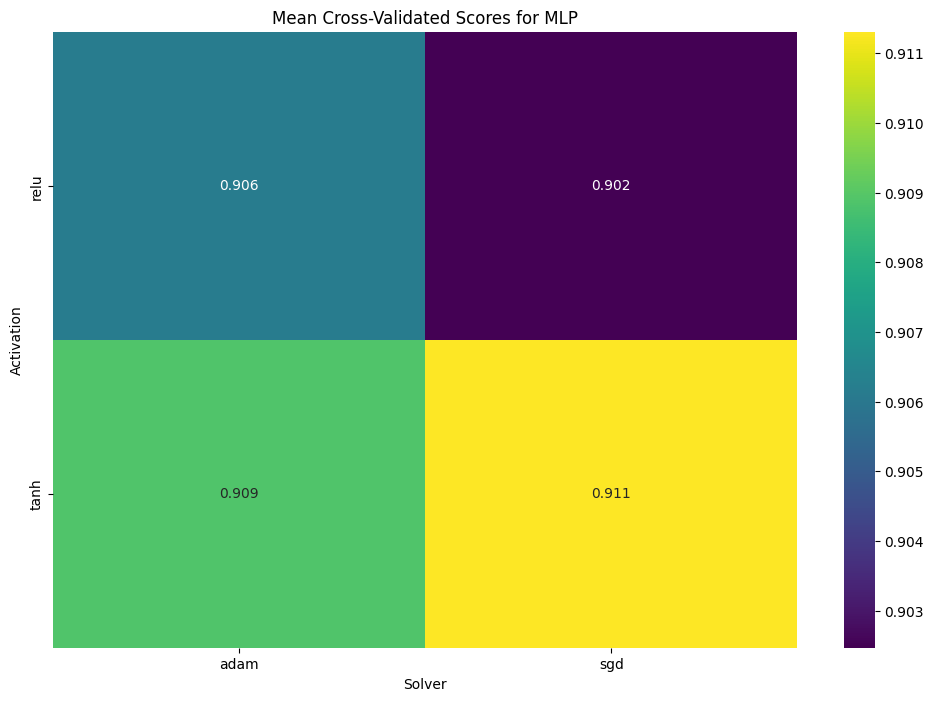

In [28]:
# Extract mean cross-validated scores and hyperparameters from the grid search results
mean_scores_mlp = grid_search_mlp.cv_results_['mean_test_score']
params_mlp = grid_search_mlp.cv_results_['params']

# Extract unique values for each hyperparameter from the parameter combinations
hidden_layer_sizes = np.unique([x['hidden_layer_sizes'] for x in params_mlp])
activations = np.unique([x['activation'] for x in params_mlp])
solvers = np.unique([x['solver'] for x in params_mlp])
max_iters = np.unique([x['max_iter'] for x in params_mlp])

# Reshape mean scores into a 2D array for heatmap
mean_scores_mlp = np.array(mean_scores_mlp).reshape(len(hidden_layer_sizes), len(activations), len(solvers), len(max_iters))

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mean_scores_mlp.mean(axis=(0, 3)), annot=True, fmt='.3f', cmap='viridis',
            xticklabels=solvers, yticklabels=activations)
plt.xlabel('Solver')
plt.ylabel('Activation')
plt.title('Mean Cross-Validated Scores for MLP')
plt.show()

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  # Number of neighbors to consider
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Create the KNN classifier
knn_classifier = KNeighborsClassifier()

# Perform grid search with cross-validation
grid_search_knn = GridSearchCV(knn_classifier, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search_knn.fit(X_train, y_train)

# Print the best parameters found
print("Best Parameters:", grid_search_knn.best_params_)

# Print the best cross-validation score
print("Best Cross-Validation Score:", grid_search_knn.best_score_)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Best Cross-Validation Score: 0.9865853658536586


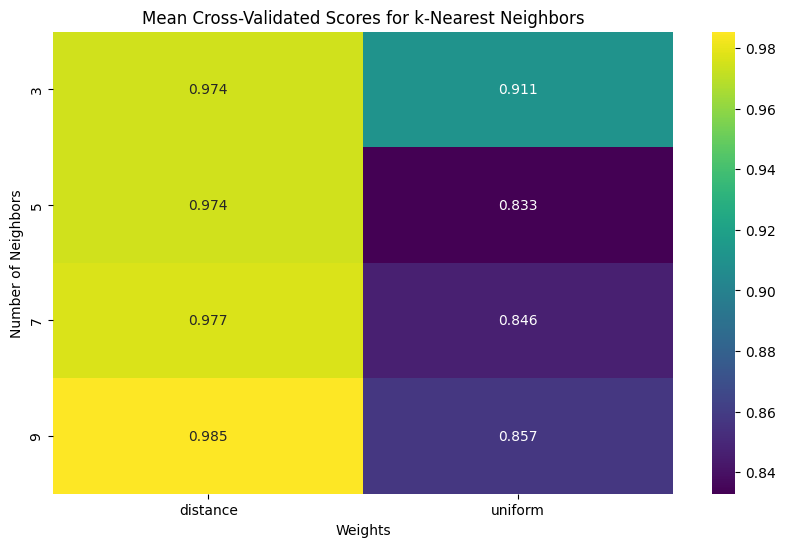

In [42]:
# Extract mean cross-validated scores and hyperparameters from the grid search results
mean_scores_knn = grid_search_knn.cv_results_['mean_test_score']
params_knn = grid_search_knn.cv_results_['params']

# Extract unique values for n_neighbors and weights from the parameter combinations
n_neighbors = np.unique([x['n_neighbors'] for x in params_knn])
weights = np.unique([x['weights'] for x in params_knn])

# Create a 2D array to store mean scores
mean_scores_2d_knn = np.zeros((len(n_neighbors), len(weights)))

# Populate mean scores into the 2D array
for mean_score, param in zip(mean_scores_knn, params_knn):
    n_neighbors_idx = np.where(n_neighbors == param['n_neighbors'])[0][0]
    weights_idx = np.where(weights == param['weights'])[0][0]
    mean_scores_2d_knn[n_neighbors_idx, weights_idx] = mean_score

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(mean_scores_2d_knn, annot=True, fmt='.3f', cmap='viridis',
            xticklabels=weights, yticklabels=n_neighbors)
plt.xlabel('Weights')
plt.ylabel('Number of Neighbors')
plt.title('Mean Cross-Validated Scores for k-Nearest Neighbors')
plt.show()


## Model Evaluation and Comparative Analysis

In [30]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
models = {
    'SVM': SVC(probability=True),
    'Decision Tree': DecisionTreeClassifier(),
    'Neural Network': MLPClassifier(max_iter=2000),
    'KNN': KNeighborsClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    results[name] = {
        'Accuracy': accuracy_score(y_test, predictions),
        'Classification Report': classification_report(y_test, predictions),
    }

# Print the results
for model_name, metrics in results.items():
    print(f'\n{model_name} Model Metrics:')
    print('Accuracy:', metrics['Accuracy'])
    print('Classification Report:')
    print(metrics['Classification Report'])


SVM Model Metrics:
Accuracy: 0.9365853658536586
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93        91
           1       0.95      0.94      0.94       114

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205


Decision Tree Model Metrics:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00       114

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205


Neural Network Model Metrics:
Accuracy: 0.9853658536585366
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        91
           1   

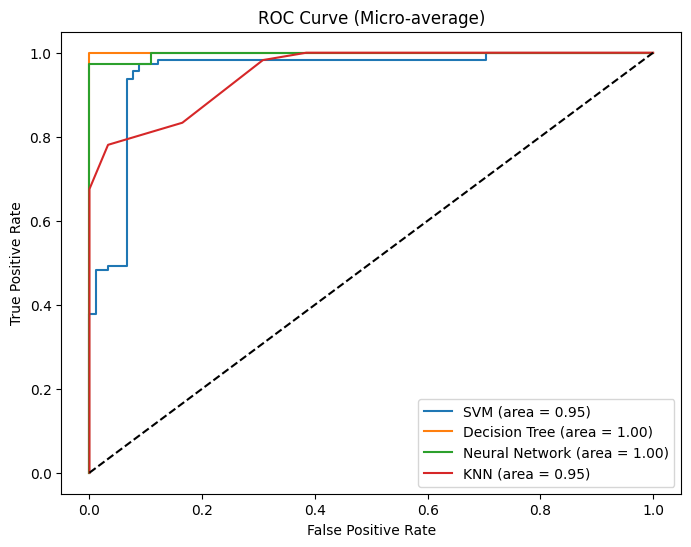

In [29]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

# Binarize the labels
y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))

plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict_proba(X_test)
    
    # For binary classification, consider only probabilities for the positive class (class 1)
    if len(predictions.shape) == 1:
        fpr, tpr, _ = roc_curve(y_test_binarized, predictions)
        roc_auc = auc(fpr, tpr)
    else:
        fpr, tpr, _ = roc_curve(y_test_binarized, predictions[:, 1])
        roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Micro-average)')
plt.legend(loc='best')
plt.show()

In [34]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
import time

# Initialize classifiers
svm_classifier = SVC()
decision_tree_classifier = DecisionTreeClassifier()
mlp_classifier = MLPClassifier()
knn_classifier = KNeighborsClassifier()

classifiers = {
    "SVM": svm_classifier,
    "Decision Tree": decision_tree_classifier,
    "MLP": mlp_classifier,
    'KNN': KNeighborsClassifier()
    
}

# Training time comparison
training_times = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.fit(X_train, y_train)
    end_time = time.time()
    training_times[name] = end_time - start_time

# Prediction time comparison
prediction_times = {}
for name, clf in classifiers.items():
    start_time = time.time()
    clf.predict(X_test)
    end_time = time.time()
    prediction_times[name] = end_time - start_time

# Print out training and prediction times
print("Training Times:")
for name, time_taken in training_times.items():
    print(f"{name}: {time_taken:.4f} seconds")

print("\nPrediction Times:")
for name, time_taken in prediction_times.items():
    print(f"{name}: {time_taken:.4f} seconds")

Training Times:
SVM: 0.0233 seconds
Decision Tree: 0.0050 seconds
MLP: 0.8662 seconds
KNN: 0.0029 seconds

Prediction Times:
SVM: 0.0163 seconds
Decision Tree: 0.0000 seconds
MLP: 0.0147 seconds
KNN: 0.0190 seconds


C:\Users\mukth\pythonlab\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


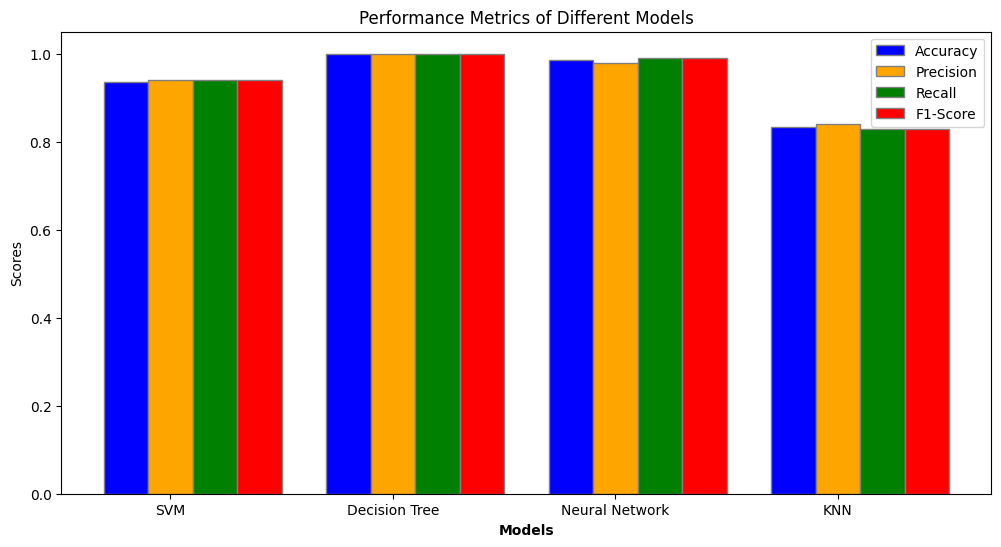

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Model names
models = ['SVM', 'Decision Tree', 'Neural Network', 'KNN']

# Metrics
accuracy = [0.9365853658536586, 1.0, 0.9853658536585366, 0.8341463414634146]
precision = [0.94, 1.0, 0.98, 0.84]
recall = [0.94, 1.0, 0.99, 0.83]
f1_score = [0.94, 1.0, 0.99, 0.83]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(accuracy))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Create bar plot
plt.figure(figsize=(12, 6))
plt.bar(r1, accuracy, color='blue', width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, precision, color='orange', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, recall, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, f1_score, color='red', width=bar_width, edgecolor='grey', label='F1-Score')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(accuracy))], models)

# Add labels and title
plt.ylabel('Scores')
plt.title('Performance Metrics of Different Models')

# Create legend & Show graphic
plt.legend()
plt.show()
